In [39]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
import pandas as pd
import numpy as np
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
import os
import warnings 
import glob
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, ConfusionMatrixDisplay, recall_score
from PIL import Image
import os
from pylab import *
from utils import * 
from sklearn.model_selection import train_test_split
import json
import lzma
import json

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [23]:
files = []
likes = []
data = pd.DataFrame()
for i in glob.glob('data/*/*json.xz'):



    with lzma.open(i, "rt") as file:
        content = file.read()

    a = json.loads(content)
    like = a['node']['edge_media_preview_like']['count']
    files.append(i)
    likes.append(like)
data['files'] = files
data['likes'] = likes   


In [ ]:
for i in glob.glob('data/*'):
    source_directory = f'{i}/'  
    target_directory = f'{i}/images'  

    resize_images(source_directory, target_directory)

In [24]:
def get_path(path):
    parts = path.split("/")

    
    before_images = parts[0]+'/'+parts[1]
    return before_images

data['path'] = data['files'].apply(get_path)
data['path'].loc[0]

'data/kayaancontractor_100226_2868439159916464863_205_2'

In [25]:
name_keys = []
file_keys = []
df_file_name = pd.DataFrame()
for i in glob.glob('data/*/images/*'):
    parts = i.split("images")
    before_images = parts[0].strip("/")
    name_keys.append(before_images)
    for j in glob.glob(f'{i}*'):
        file_keys.append(j)
        

df_file_name['name_keys'] = name_keys
df_file_name['file_keys'] = file_keys
data_merged = pd.merge(data, df_file_name, left_on='path', right_on='name_keys', how='left')


In [17]:
def get_features_images_path():
    df = pd.DataFrame()

    for i in glob.glob('data/*/images/*.jpg'):
        a = detect_objects(i)
        a['path'] = i
        df = pd.concat([df, a])
   
    return df
features = get_features_images_path()
features.to_csv('features.csv')

In [19]:
b = features.pivot_table(
                            index=['path'],
                            columns='objects',
                            values='scores',
                            aggfunc='mean'
                        )
b.columns = [i.lower().replace(' ','_') for i in b.columns]
b = b.reset_index()
b = b.fillna(0)
b

,path,accordion,air_purifier,airplane,animal,baby_carrier,backpack,bag,bagged_packaged_goods,baked_goods,ball,balloon,banana,baseball_bat,baseball_glove,basket,basketball,bat,bean_bag,bed,beer,belt,bench,bicycle,bicycle_wheel,billiard_table,bird,bladeless_fan,boat,book,bookcase,boot,bottle,bottled_and_jarred_packaged_goods,bow_and_arrow,bowl,bowtie,box,boxed_packaged_goods,bracelet,brassiere,bread,bridge,bronze_sculpture,building,burrito,bus,bust,cabbage,cabinetry,cake,cake_stand,camel,camera,camera_lens,candle,canoe,car,cat,ceiling_fan,chair,chandelier,chest_of_drawers,chopsticks,christmas_tree,clock,clothing,coaster,coat,cocktail,coffee_cup,coffee_table,coffeemaker,container,cookie,couch,cowboy_hat,crown,cufflink,cutting_board,dessert,dog,doll,door,doughnut,dress,drink,dumbbell,eagle,earrings,egg,expresso_machine,fedora,figurine,fish,flag,flash,flower,flowerpot,food,football,football_helmet,footwear,fork,french_fries,fruit,frying_pan,furniture,giraffe,glasses,glove,goggles,golf_ball,greeting_card,guacamole,guitar,hamburger,handbag,hat,headphones,helmet,high_heels,home_appliance,horse,house,houseplant,ice_cream,jacket,jacuzzi,jeans,jet_ski,juice,kettle,kitchen_&_dining_room_table,kitchen_appliance,kitchen_appliance,knife,ladder,lamp,lantern,laptop,lemon,license_plate,light_fixture,lighthouse,lighting,loveseat,luggage_&_bags,magazine,microphone,microwave_oven,milk,miniskirt,mirror,mobile_phone,motorcycle,muffin,musical_instrument,necklace,nightstand,notebook,outerwear,overall,packaged_goods,painting,panda,pants,parking_meter,pasta,pastry,pen,perfume,person,picture_frame,pillow,pizza,plant,plate,poster,pressure_cooker,punching_bag,rabbit,raccoon,racket,refrigerator,remote_control,roller_skates,salad,sandal,sandwich,satchel,saucer,scarf,sculpture,shirt,shoe,shorts,skirt,slow_cooker,snowmobile,soap_dispenser,sock,sombrero,spoon,stool,straw_hat,strawberry,stroller,suit,suitcase,sun_hat,sunglasses,swimwear,table,table_top,tableware,taco,tart,teacup,television,tent,throw_pillow,tiara,tie,tiger,tin_can,tire,tomato,toothbrush,top,toy,toy_vehicle,treadmill,tripod,truck,trumpet,tubed_packaged_goods,umbrella,underpants,van,vase,vegetable,video_camera,waffle,wallet,waste_container,watch,wheel,wheelchair,whisk,whiteboard,window,wine_bottle,wine_glass,wok,woodpecker
0,data/aashnashroff_969148_3000403601659402518_2...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.776262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.580437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.582338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.604729,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.676106,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.756916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.615885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,data/aashnashroff_969148_3000403601659402518_2...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.597469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [63]:
data_final = data_merged.merge(b, left_on = ['file_keys'], right_on = ['path'], how = 'left')
data_final['likes'] = data_final['likes'].replace(-1,0)
data_final['target'] = np.where(data_final['likes']>500000,1,0)
data_final = data_final.fillna(0)

In [60]:
images = load_and_prepare_images(data_final, 'file_keys')
target = data_final['target'].values.astype('float32')

In [15]:
#influencers = [
#    'mrbeast',
#    ]

Application_Credentials = '/Users/aladelca/Downloads/massive-acrobat-421018-1d8b6ce1a11a.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = Application_Credentials

In [267]:

#data = pd.DataFrame()
#df_features = pd.DataFrame()
#for influencer in influencers:
#    data = pd.concat([data, preprocessing(influencer)])
#    data = data.reset_index(drop=True)
#    df_features = pd.concat([df_features,get_features_images(influencer)])
#    df_features = df_features.reset_index(drop=True)


In [269]:
#df_final = preprocess_features(df_features, data)

In [67]:
#images = load_and_prepare_images(data)
#likes = df_final['likes'].values.astype('float32')



In [61]:
x_train, x_test, y_train, y_test = train_test_split(images, target, test_size=0.2, random_state=123)
df_train, df_test = train_test_split(data_final, test_size=0.2, random_state=123)
x_fit, x_val, y_fit, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=123)
df_fit, df_val = train_test_split(df_train, test_size=0.2, random_state=123)


In [272]:
#enc = OneHotEncoder()
#df_fit_enc = pd.concat([pd.DataFrame(enc.fit_transform(df_fit[['influencer']]).toarray(), 
#                          columns = enc.categories_[0], 
#                          index = df_fit.index),
#                          df_fit.drop(columns = ['influencer'])], axis = 1)
#df_val_enc = pd.concat([pd.DataFrame(enc.transform(df_val[['influencer']]).toarray(),
#                          columns = enc.categories_[0],
#                          index = df_val.index),
#                          df_val.drop(columns = ['influencer'])], axis = 1)

#df_test_enc = pd.concat([pd.DataFrame(enc.transform(df_test[['influencer']]).toarray(),
#                           columns = enc.categories_[0],
#                           index = df_test.index),
#                           df_test.drop(columns = ['influencer'])], axis = 1)

In [273]:
#df_fit_enc = df_fit_enc.fillna(0)
#df_val_enc = df_val_enc.fillna(0)
#df_test_enc = df_test_enc.fillna(0) 

In [81]:
### Scaling
DROP_VARS = ['likes','fecha_utc','hashtags','comentarios','key_date','filename','caption','img_source','clean_path']
NOT_CONSIDERED_COLUMNS = ['files', 'likes', 'path_x', 'name_keys', 'file_keys', 'path_y','target']
esc = MinMaxScaler()
df_fit_esc = esc.fit_transform(df_fit.loc[:, ~df_fit.columns.isin(NOT_CONSIDERED_COLUMNS)])
df_val_esc = esc.transform(df_val.loc[:, ~df_val.columns.isin(NOT_CONSIDERED_COLUMNS)])
df_test_esc = esc.transform(df_test.loc[:, ~df_test.columns.isin(NOT_CONSIDERED_COLUMNS)])

df_fit_esc = np.nan_to_num(df_fit_esc, 0)
df_val_esc = np.nan_to_num(df_val_esc, 0)
df_test_esc = np.nan_to_num(df_test_esc, 0)

In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

K.clear_session()
image_input = Input(shape=(128, 128, 3))
x = Conv2D(32, (3, 3), activation='relu')(image_input)
x = MaxPooling2D(2, 2)(x)
x = MaxPooling2D(2, 2)(x)
x = Conv2D(32, (3, 3), activation='relu')(image_input)
x = MaxPooling2D(2, 2)(x)
x = Dropout(0.5)(x) 
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(2, 2)(x)
x = Flatten()(x)

# Entrada para la información del influencer
influencer_input = Input(shape=(df_fit_esc.shape[1],))
y = Dense(10, activation='relu')(influencer_input)  # Ajusta el tamaño según el número de categorías

# Combinar las entradas
combined = concatenate([x, y])

# Capas totalmente conectadas después de la concatenación
z = Dense(256, activation='relu')(combined)
z = Dense(1, activation = 'sigmoid')(z)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)
model = Model(inputs=[image_input, influencer_input], outputs=z)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit([x_fit, df_fit_esc], y_fit, 
          epochs=10, 
          validation_data=([x_val, df_val_esc], y_val),
          callbacks=[early_stopping])

Epoch 1/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.8418 - loss: 1.4025 - val_accuracy: 0.9037 - val_loss: 0.4313
Epoch 2/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - accuracy: 0.9090 - loss: 0.2910 - val_accuracy: 0.8992 - val_loss: 0.4730
Epoch 3/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - accuracy: 0.9125 - loss: 0.2681 - val_accuracy: 0.8890 - val_loss: 0.4192
Epoch 4/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - accuracy: 0.9076 - loss: 0.2497 - val_accuracy: 0.8732 - val_loss: 0.3725
Epoch 5/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - accuracy: 0.9184 - loss: 0.2351 - val_accuracy: 0.9071 - val_loss: 0.3136
Epoch 6/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - accuracy: 0.9216 - loss: 0.1992 - val_accuracy: 0.8607 - val_loss: 0.3511
Epoch 7/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - accuracy: 0.9331 - loss: 0.1682 - val_accuracy: 0.8981 - val_loss: 0.3229
Epoch 8/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - accuracy: 0.9473 - loss: 0.1277 - val_acc

In [111]:
### Finding the best threshold
predictions = model.predict([x_test, df_test_esc])
list_sensitivity = []
list_specificity = []
for i in np.arange(0.01, 1, 0.01):
    preds = np.where(predictions>i,1,0)
    list_sensitivity.append(recall_score(y_test, preds, pos_label=1))
    list_specificity.append(recall_score(y_test, preds, pos_label=0))


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


In [112]:
best_threshold = np.arange(0.01, 1, 0.01)[np.argmax(np.array(list_sensitivity) + np.array(list_specificity) - 1)]
final_preds = np.where(predictions>best_threshold,1,0)


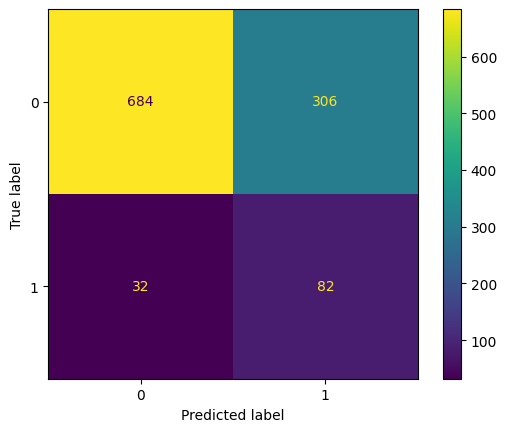

In [113]:
cm = confusion_matrix(y_test, final_preds)
ConfusionMatrixDisplay(cm).plot()

In [115]:

print(roc_auc_score(y_test, predictions))
print(accuracy_score(y_test, final_preds))
print(recall_score(y_test, final_preds, pos_label=1))
print(recall_score(y_test, final_preds, pos_label=0))


0.7429027113237641
0.6938405797101449
0.7192982456140351
0.6909090909090909
